# Menghubungkan Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [ ]:
!pip install rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 291.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.4 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import random
import cv2
import os
import shutil
import re
import matplotlib.pyplot as plt
from PIL import Image
from rembg import remove
import glob as gb
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display, Image
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, precision_score, accuracy_score
from tensorflow.keras.layers import Dense, MaxPooling2D, Dropout, Conv2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.metrics import Precision
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler

# Remove BG (Jangan Di Run Karena Udah di Run Sebelumnya)

In [ ]:
# Fungsi untuk menghapus background dan menyimpan ke folder baru
def process_image_folder(input_folder, output_folder):
    # Jika folder output belum ada, buat folder baru
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop melalui semua file dalam folder input
    for filename in os.listdir(input_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)

            # Buka gambar dan hapus backgroundnya
            with open(input_path, 'rb') as input_file:
                input_image = input_file.read()

            output_image = remove(input_image)

            # Simpan gambar yang telah dihapus backgroundnya
            with open(output_path, 'wb') as output_file:
                output_file.write(output_image)

            print(f"Processed: {filename}")

# Path folder input dan output
input_base_folder = '/content/drive/MyDrive/Dataset Kaktus 60/Original'
output_base_folder = '/content/drive/MyDrive/Dataset Kaktus 60/Removed BG'

# Loop melalui folder input dan buat folder baru untuk output
for folder_name in os.listdir(input_base_folder):
    input_folder_path = os.path.join(input_base_folder, folder_name)
    output_folder_path = os.path.join(output_base_folder, folder_name)

    if os.path.isdir(input_folder_path):
        # Proses setiap folder
        process_image_folder(input_folder_path, output_folder_path)

# Memuat Data

In [ ]:
import os
import pandas as pd
from pathlib import Path

# Direktori tempat gambar-gambar disimpan
image_dir = Path('/content/drive/MyDrive/Dataset Kaktus 60/Removed BG')

# Mendapatkan path file dan label
filepaths = list(image_dir.glob(r'**/*.*'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

file_extensions = set(path.suffix.lower() for path in filepaths)
print("Ekstensi File yang Ditemukan:", file_extensions)

filepaths = pd.Series(filepaths, name='Filepaths').astype(str)
labels = pd.Series(labels, name='Labels')

# Menggabungkan path file dengan label
images_df = pd.concat([filepaths, labels], axis=1)

# Acak data dan reset index
images_df = images_df.sample(frac=1).reset_index(drop=True)

# Menampilkan data
images_df.head()


Ekstensi File yang Ditemukan: {'.png'}


Filepaths  \
0  /content/drive/MyDrive/Dataset Kaktus 60/Remov...   
1  /content/drive/MyDrive/Dataset Kaktus 60/Remov...   
2  /content/drive/MyDrive/Dataset Kaktus 60/Remov...   
3  /content/drive/MyDrive/Dataset Kaktus 60/Remov...   
4  /content/drive/MyDrive/Dataset Kaktus 60/Remov...   

                          Labels  
0  echeveria agavoides red blush  
1          Haworthia Rainwarthii  
2                 crassula golum  
3              kalancoe roseleaf  
4  echeveria agavoides red blush

In [ ]:
images_df.Labels.value_counts()

Labels
echeveria agavoides red blush    60
Haworthia Rainwarthii            60
crassula golum                   60
kalancoe roseleaf                60
Haworthia retusa                 60
euporbia monadenium richi        60
kalancoe tumentosa               60
echeveria cansu                  60
Kalancoe oak leaf                60
crassula jade plant variegata    60
echeveria agavoides lipstik      60
euporbia trigona                 60
euporbia laktea                  60
haworthia fasciata               60
Crassula Fortula caria aparia    59
Name: count, dtype: int64

Visualisasi

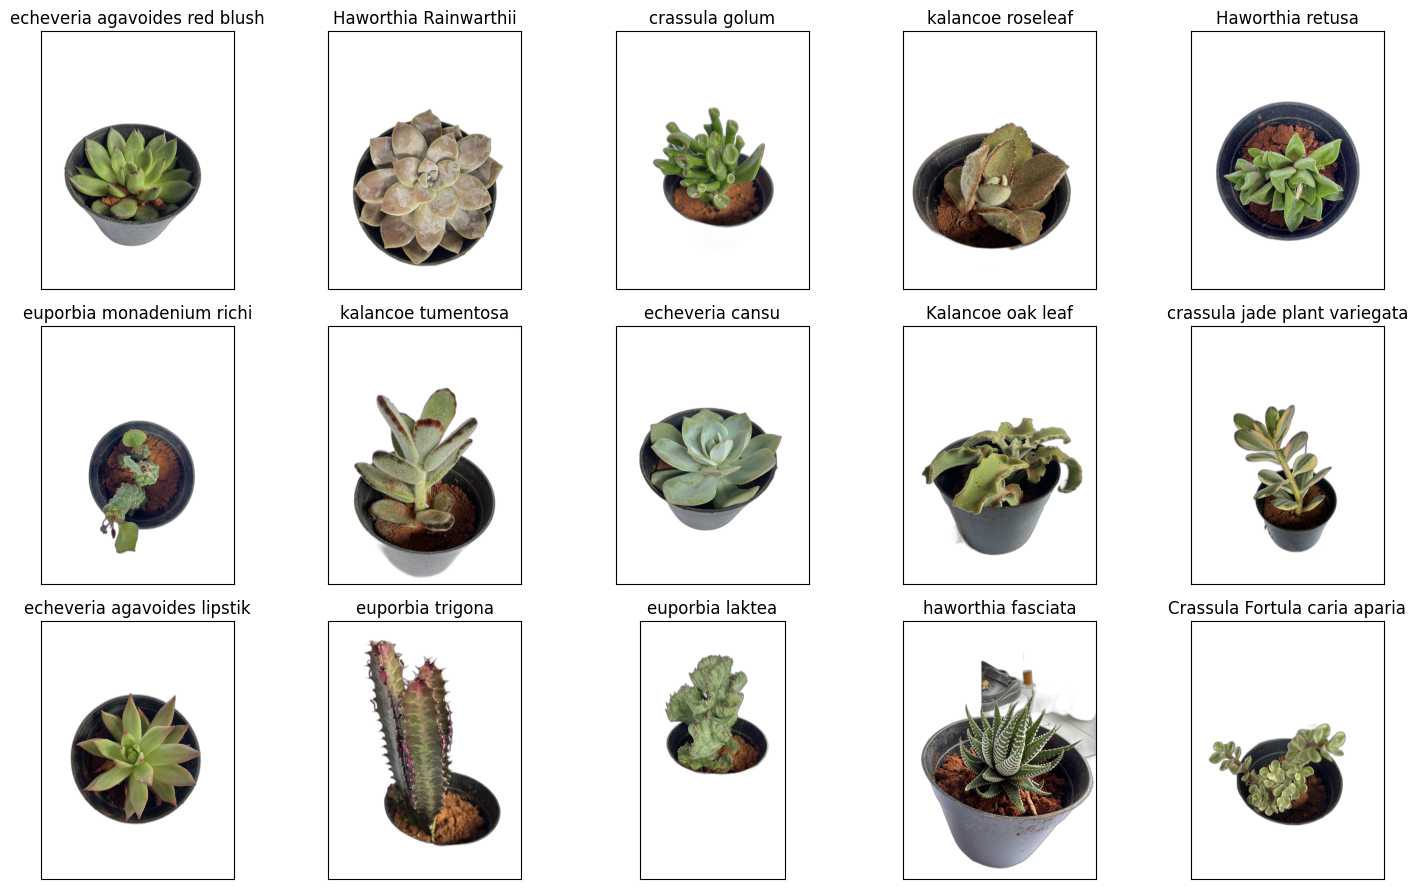

In [ ]:
# Ensure you have one unique image per label
unique_images_df = images_df.drop_duplicates(subset='Labels')

# Number of labels (75)
num_labels = unique_images_df.shape[0]

# Grid dimensions
ncols = 5
nrows = (num_labels // ncols) + (num_labels % ncols > 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 3),
                         subplot_kw={'xticks': [], 'yticks': []})

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < num_labels:
        img_path = unique_images_df.Filepaths.iloc[i]
        label = unique_images_df.Labels.iloc[i]
        ax.imshow(plt.imread(img_path))
        ax.set_title(label)
    else:
        ax.axis('off')  # Turn off the axis for empty subplots

plt.tight_layout()
plt.show()

Pembagian data

In [ ]:
train_df, test_df = train_test_split(images_df, test_size=0.2, random_state=2, shuffle=True)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=2, shuffle=True)

In [ ]:
train_df.count()

Filepaths    719
Labels       719
dtype: int64

In [ ]:
val_df.count()

Filepaths    90
Labels       90
dtype: int64

In [ ]:
test_df.count()

Filepaths    90
Labels       90
dtype: int64

# Preprocessing Data

In [ ]:
# Tetapkan seed acak
seed_value = 2
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
tf.keras.utils.set_random_seed(seed_value)
tf.config.experimental.enable_op_determinism()

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Fungsi untuk Gaussian Blur
def apply_blur(image):
    # Mengubah ke format OpenCV jika image dalam format PIL
    if isinstance(image, np.ndarray):
        blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # Kernel 5x5, sigma=0
    else:
        blurred_image = image
    return blurred_image

# Fungsi untuk Cutout (Random Erasing)
def apply_cutout(image, mask_size=50):
    height, width, _ = image.shape
    y = np.random.randint(height)
    x = np.random.randint(width)

    y1 = np.clip(y - mask_size // 2, 0, height)
    y2 = np.clip(y + mask_size // 2, 0, height)
    x1 = np.clip(x - mask_size // 2, 0, width)
    x2 = np.clip(x + mask_size // 2, 0, width)

    # Apply mask (cutout) dengan mengisi area yang dihapus dengan hitam atau nilai tertentu
    image[y1:y2, x1:x2] = 0  # Atau bisa gunakan nilai lain, seperti np.mean(image)
    return image

# Fungsi preprocessing untuk blur dan cutout
def custom_preprocessing(image):
    # Terapkan blur
    image = apply_blur(image)
    # Terapkan cutout
    image = apply_cutout(image)
    return image

In [ ]:
batch = 32

# ImageDataGenerator untuk data pelatihan dengan augmentasi
train_datagen = ImageDataGenerator(
    rotation_range=20,  # augmentasi lainnya seperti rotasi
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    preprocessing_function=custom_preprocessing,
    rescale=1./255  # Menambahkan rescale untuk normalisasi
)

# ImageDataGenerator untuk data validasi tanpa augmentasi
val_datagen = ImageDataGenerator(rescale=1./255)  # Menambahkan rescale untuk normalisasi

# ImageDataGenerator untuk data pengujian tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)  # Menambahkan rescale untuk normalisasi

# Flow from DataFrame untuk data pelatihan
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="Filepaths",
    y_col="Labels",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=batch,
    shuffle=True
)

# Flow from DataFrame untuk data validasi
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Filepaths",
    y_col="Labels",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=batch,
    shuffle=False
)

# Flow from DataFrame untuk data pengujian
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="Filepaths",
    y_col="Labels",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=batch,
    shuffle=False
)

Found 719 validated image filenames belonging to 15 classes.
Found 90 validated image filenames belonging to 15 classes.
Found 90 validated image filenames belonging to 15 classes.


In [ ]:
train_generator.class_indices

{'Crassula Fortula caria aparia': 0,
 'Haworthia Rainwarthii': 1,
 'Haworthia retusa': 2,
 'Kalancoe oak leaf': 3,
 'crassula golum': 4,
 'crassula jade plant variegata': 5,
 'echeveria agavoides lipstik': 6,
 'echeveria agavoides red blush': 7,
 'echeveria cansu': 8,
 'euporbia laktea': 9,
 'euporbia monadenium richi': 10,
 'euporbia\xa0trigona': 11,
 'haworthia fasciata': 12,
 'kalancoe roseleaf': 13,
 'kalancoe tumentosa': 14}

# Pelatihan Model berbasis CNN MobileNet

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model

# Membuat model MobileNet tanpa lapisan teratas (top layer)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Mematikan pelatihan lapisan-lapisan MobileNet yang sudah dilatih
for layer in base_model.layers:
    layer.trainable = False

# Mengambil output dari base model
base_model_output = base_model.output

# Menggunakan GlobalAveragePooling2D
pooling = GlobalMaxPooling2D()(base_model_output)
dense1 = Dense(256, activation='relu')(pooling)
output_layer = Dense(15, activation='softmax')(dense1)

# Membuat model baru menggunakan API fungsional
model = Model(inputs=base_model.input, outputs=output_layer)

# Melihat ringkasan model
model.summary()


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,495,119 (13.33 MB)

 Trainable params: 266,255 (1.02 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

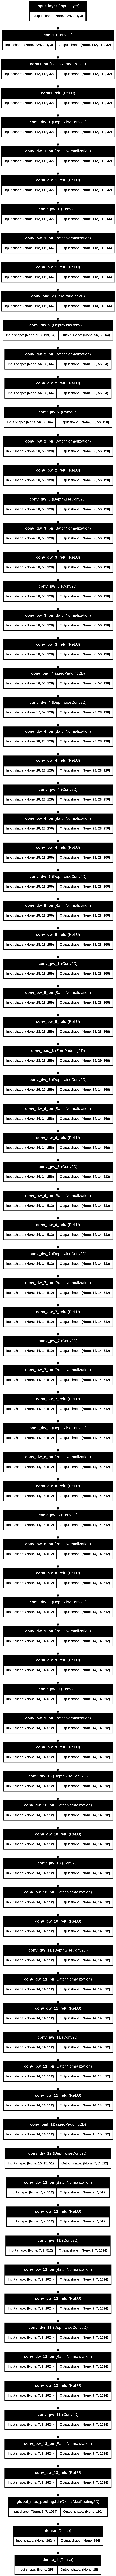

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.optimizers import SGD


Opt = SGD(learning_rate=0.0001, momentum=0.8)


model.compile(optimizer=Opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epoch = 100

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_generator,validation_data=val_generator, epochs=epoch, verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 509s 16s/step - accuracy: 0.0765 - loss: 6.5096 - val_accuracy: 0.0889 - val_loss: 4.0233
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 346s 9s/step - accuracy: 0.1724 - loss: 3.2962 - val_accuracy: 0.1444 - val_loss: 3.0813
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 291s 9s/step - accuracy: 0.2550 - loss: 2.6038 - val_accuracy: 0.1667 - val_loss: 2.5186
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 333s 10s/step - accuracy: 0.3919 - loss: 1.9999 - val_accuracy: 0.3111 - val_loss: 2.1307
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 291s 8s/step - accuracy: 0.4076 - loss: 1.8060 - val_accuracy: 0.3667 - val_loss: 1.8301
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 283s 9s/step - accuracy: 0.5901 - loss: 1.3880 - val_accuracy: 0.4667 - val_loss: 1.5853
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 269s 9s/step - accuracy: 0.5645 - loss: 1.3826 - val_accuracy: 0.4778 - val_loss: 1.4319
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 327s 9s/step - accuracy: 0.6583 - loss: 1.0944 - val_accuracy: 0.5667 - val

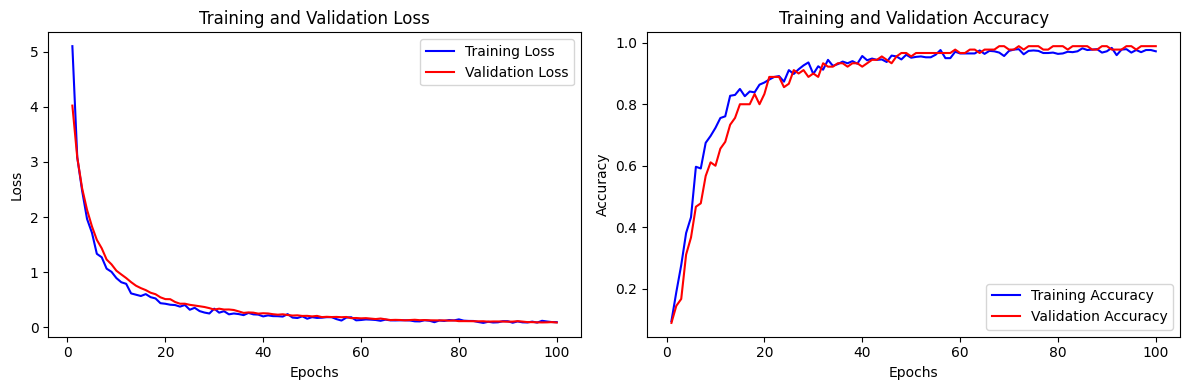

In [ ]:
# Mengambil data dari history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_loss) + 1)

# Plotting Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Testing**

In [ ]:
pred = model.predict(test_generator)
pred = np.argmax(pred, axis=1)

labels = train_generator.class_indices
labels = dict((v,k) for k, v in labels.items())

print(labels)
print(pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 43s 15s/step
{0: 'Crassula Fortula caria aparia', 1: 'Haworthia Rainwarthii', 2: 'Haworthia retusa', 3: 'Kalancoe oak leaf', 4: 'crassula golum', 5: 'crassula jade plant variegata', 6: 'echeveria agavoides lipstik', 7: 'echeveria agavoides red blush', 8: 'echeveria cansu', 9: 'euporbia laktea', 10: 'euporbia monadenium richi', 11: 'euporbia\xa0trigona', 12: 'haworthia fasciata', 13: 'kalancoe roseleaf', 14: 'kalancoe tumentosa'}
[ 8  3  7 13  3  6 14  2 13  5 11  6  7 14 13  0  9 12  7  3  0  8  8 12
 11  1 11  9  6  3 11  9 14  1  2  1  1  3  2 11 14  3 11 13  8 10 14  6
  0  6 13  7  3  0  0 12  0 14 14 10 14  0  5  3 14  0  4  2  9  4  3  6
  8  7  2 10  7  1 12  1  8 11 13  4  1  5  0  2  5 13]


In [ ]:
class_indices = train_generator.class_indices

# Dapatkan list nama kelas
class_names = list(class_indices.keys())

# Extracting F1-score, recall, precision, and accuracy
print(classification_report(test_generator.classes, pred, target_names= class_names))

f1_value = f1_score(test_generator.classes, pred, average='weighted')
recall = recall_score(test_generator.classes, pred, average='weighted')
precision = precision_score(test_generator.classes, pred, average='weighted')
accuracy = accuracy_score(test_generator.classes, pred)


# Print with four decimal places
print(f'F1 Score: {round(f1_value, 4)}')
print(f'Recall: {round(recall, 4)}')
print(f'Precision: {round(precision, 4)}')
print(f'Accuracy: {round(accuracy, 4)}')

                               precision    recall  f1-score   support

Crassula Fortula caria aparia       1.00      1.00      1.00         9
        Haworthia Rainwarthii       1.00      1.00      1.00         7
             Haworthia retusa       1.00      1.00      1.00         6
            Kalancoe oak leaf       1.00      1.00      1.00         9
               crassula golum       1.00      0.75      0.86         4
crassula jade plant variegata       1.00      0.80      0.89         5
  echeveria agavoides lipstik       1.00      1.00      1.00         6
echeveria agavoides red blush       1.00      1.00      1.00         6
              echeveria cansu       1.00      1.00      1.00         6
              euporbia laktea       1.00      1.00      1.00         4
    euporbia monadenium richi       1.00      1.00      1.00         3
             euporbia trigona       1.00      1.00      1.00         7
           haworthia fasciata       0.75      1.00      0.86         3
     

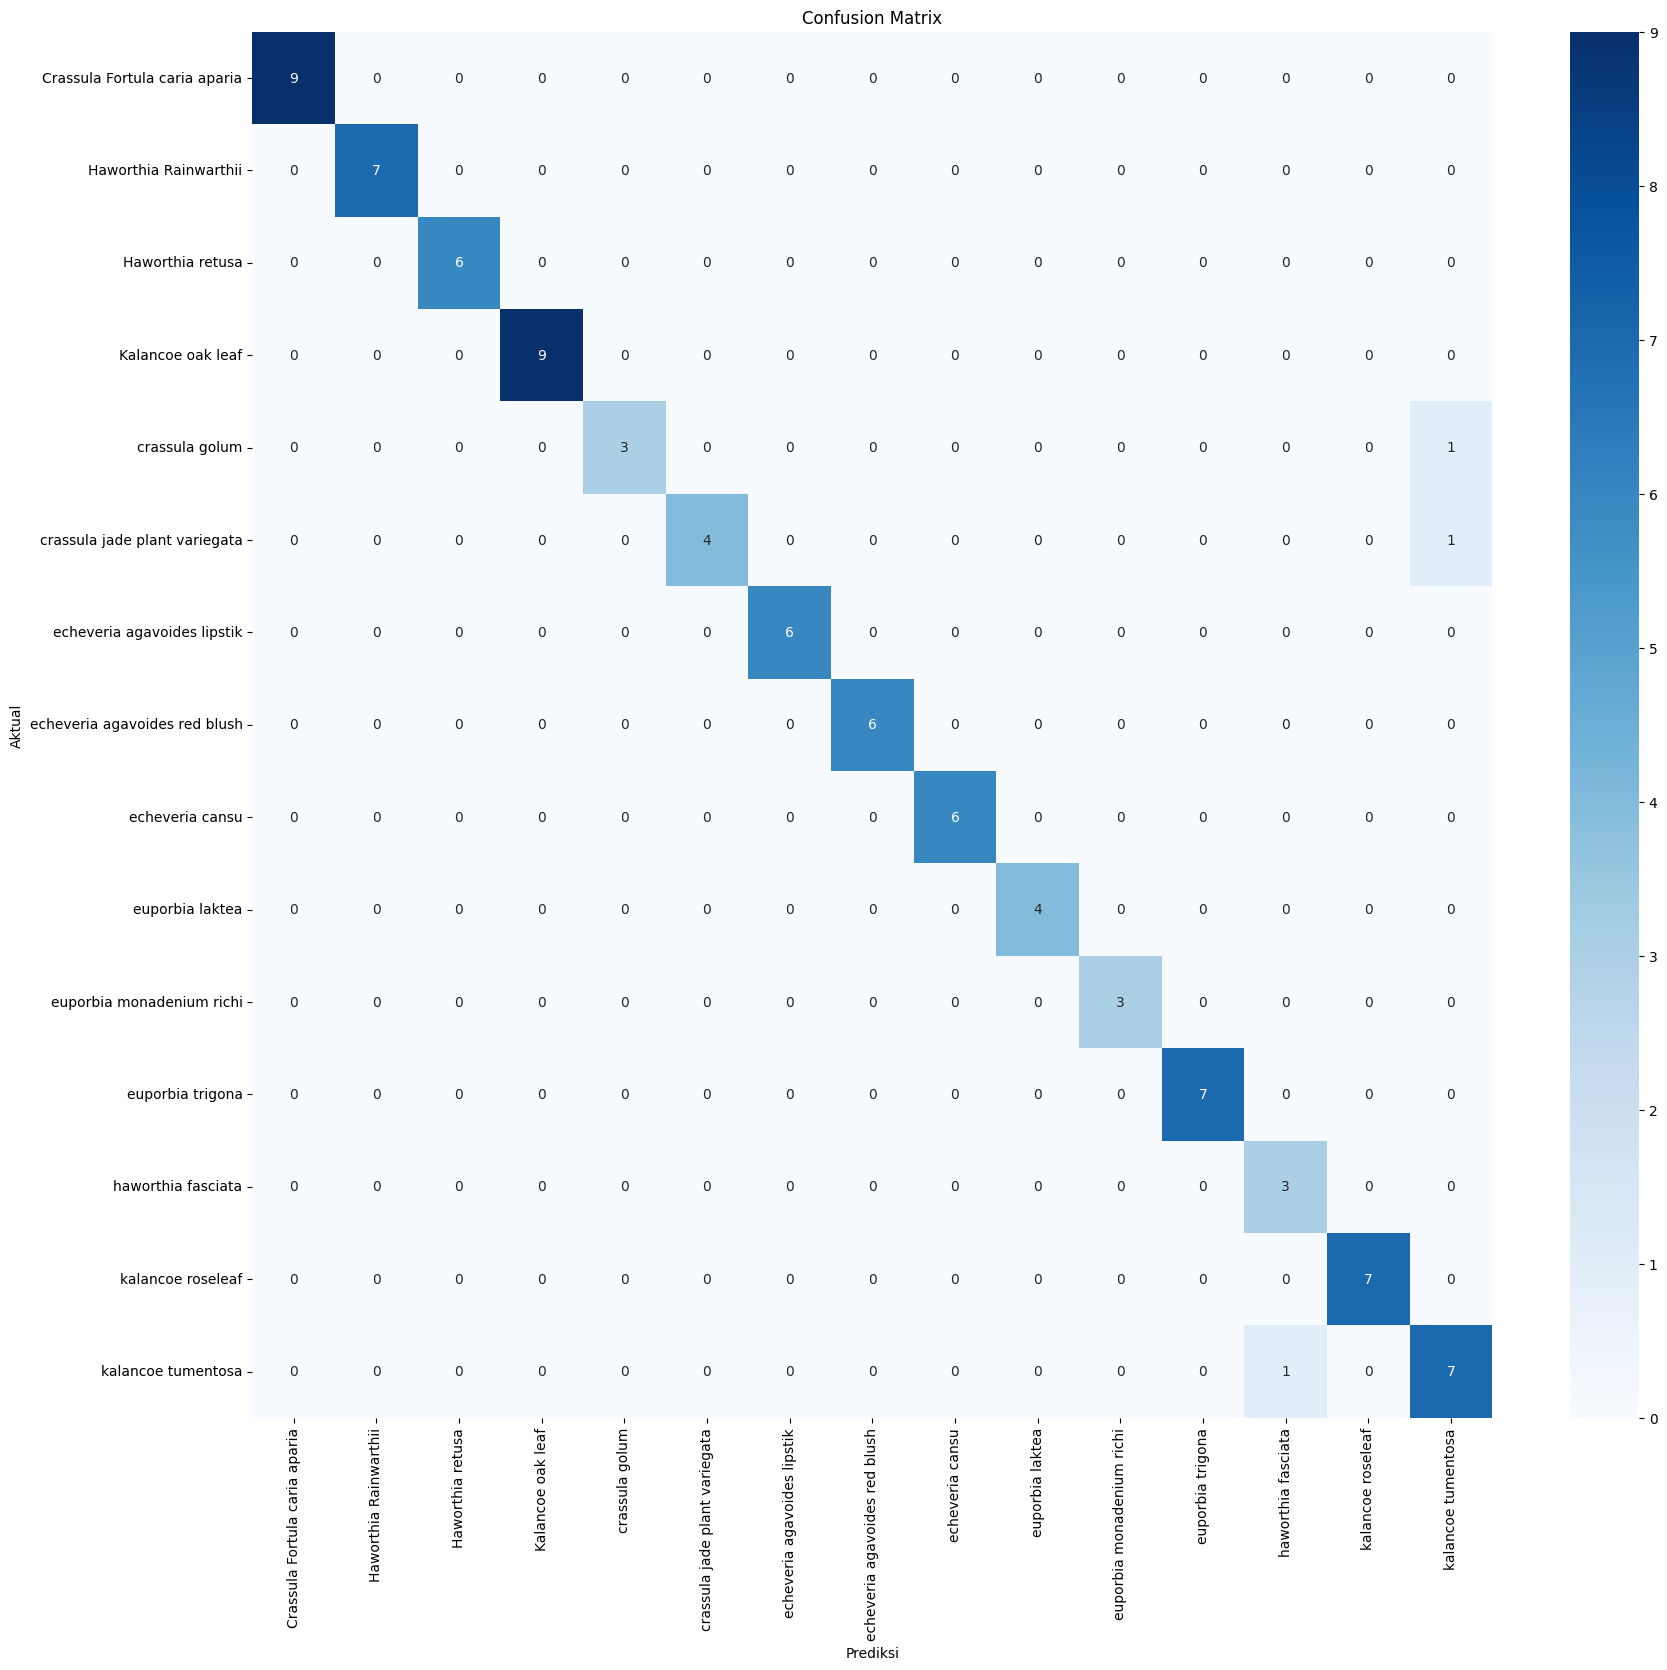

In [ ]:
cm = confusion_matrix(test_generator.classes, pred)
plt.figure(figsize=(20, 18))

heatmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=class_names,
            yticklabels=class_names)
heatmap.set_title("Confusion Matrix")
heatmap.set_xlabel("Prediksi")
heatmap.set_ylabel("Aktual")

# Menambahkan keterangan warna di samping gambar
cbar = heatmap.collections[0].colorbar

plt.show()

In [ ]:
%cd /content/drive/MyDrive/Dataset Kaktus 60

/content/drive/.shortcut-targets-by-id/1NSlG8N6rubuLIYDF4gC1YjlQAHOBfQ5x/Dataset Kaktus 60


In [ ]:
# Tentukan nama file untuk menyimpan model H5
model_filename = 'model_100.h5'

# Simpan model ke dalam file H5
model.save(model_filename)

print(f"Model telah disimpan dalam file: {model_filename}")

Model telah disimpan dalam file: model_100.h5


Convert ke TFLite

In [ ]:
import tensorflow as tf

# Muat model Keras yang telah disimpan
model = tf.keras.models.load_model('model_100.h5')

# Buat converter dari model Keras
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Opsional: Optimasi untuk memperkecil ukuran model
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Konversi model
tflite_model = converter.convert()

# Simpan model TFLite ke file
with open('model_100.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmp8ew3xshw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  137761817311392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137761815290176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137761815292112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137761815285600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137761815287888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137761815282784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137761815282608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137761815295984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137761815293696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137761815294048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13776181529528

# Prediksi Gambar Baru

In [ ]:
from google.colab import files

# Upload gambar
uploaded = files.upload()

# Pastikan nama file gambar sesuai dengan yang diunggah
image_filename = list(uploaded.keys())[0]

In [ ]:
from tensorflow.keras.models import load_model

# Tentukan nama file model H5 yang telah disimpan
model_filename = 'mobilenet_model.h5'

# Memuat model
loaded_model = load_model(model_filename)


In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Membaca gambar yang diunggah
img = load_img(image_filename, target_size=(224, 224))
img_array = img_to_array(img)

# Menambahkan dimensi batch karena model mengharapkan input dalam bentuk batch
img_array = np.expand_dims(img_array, axis=0)

# Menampilkan gambar sebelum prediksi
plt.imshow(img)
plt.title('Input Image')
plt.axis('off')
plt.show()

# Memprediksi kelas gambar
predictions = loaded_model.predict(img_array)

# Mengambil indeks kelas dengan probabilitas tertinggi
predicted_class = np.argmax(predictions[0])

# Menampilkan hasil prediksi
print(f'Gambar {image_filename} diprediksi sebagai kelas: {predicted_class}')